In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.use('bmh')

pd.set_option('display.max_columns', 200 )
pd.set_option('display.max_rows', 200 )

import os 
os.chdir('C:\\Users\LENOVO\Bank Data-20210224T174834Z-001\Bank Data')

In [ ]:
#application_data
app_data = pd.read_csv('application_data.csv')

#previous application data
prev_data = pd.read_csv('previous_application.csv')

In [ ]:
#Checking the size of rows and columns for each dataset
print('Application data has {} rows and {} columns '.format(app_data.shape[0], app_data.shape[1]))
print('Previous Application data has {} rows and {} columns '.format(prev_data.shape[0], prev_data.shape[1]))

Application data has 307511 rows and 122 columns 
Previous Application data has 1670214 rows and 37 columns 


In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Data Wrangling

- Check the shape and distribution of data <br>
- See for missing values and remvoe the feature if there are more than 30% 




In [ ]:
#first checking the percentage of missing values in application_data
missing_values = (100*(app_data.isnull().sum())/len(app_data))
missing_values = missing_values.sort_values(ascending=False)


In [ ]:
redundant_features = list(missing_values[missing_values.values > 30].index)
app_data.drop(labels=redundant_features, axis=1, inplace=True)

In [ ]:
print('Application data has {} rows and {} columns '.format(app_data.shape[0], app_data.shape[1]))

#From 122 columns we are left with only 72 features. 
#But still there are many columns with some amount of missing values which we need to deal with.

Application data has 307511 rows and 72 columns 


In [ ]:
marginal_features  = list(missing_values[missing_values.values > 0].index)

In [ ]:
#just for the sake of cimplicity I have converted our marginal_features into a dataframe
#dataframe.

marginal_features = pd.DataFrame(data=app_data, columns=['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE'])

In [ ]:
#Before plotting them on boxplot first lets see what kind of categories we are dealing with and weather they are dsicrete or continous variables

 
for i in marginal_features.columns:
  print('Columns {} has {} unique values'.format(marginal_features[i].name, marginal_features[i].nunique()))

Columns EXT_SOURCE_3 has 814 unique values
Columns AMT_REQ_CREDIT_BUREAU_YEAR has 25 unique values
Columns AMT_REQ_CREDIT_BUREAU_MON has 24 unique values
Columns AMT_REQ_CREDIT_BUREAU_WEEK has 9 unique values
Columns AMT_REQ_CREDIT_BUREAU_DAY has 9 unique values
Columns AMT_REQ_CREDIT_BUREAU_HOUR has 5 unique values
Columns AMT_REQ_CREDIT_BUREAU_QRT has 11 unique values
Columns DEF_60_CNT_SOCIAL_CIRCLE has 9 unique values
Columns OBS_60_CNT_SOCIAL_CIRCLE has 33 unique values
Columns DEF_30_CNT_SOCIAL_CIRCLE has 10 unique values
Columns OBS_30_CNT_SOCIAL_CIRCLE has 33 unique values
Columns EXT_SOURCE_2 has 119831 unique values
Columns AMT_GOODS_PRICE has 1002 unique values
Columns AMT_ANNUITY has 13672 unique values
Columns CNT_FAM_MEMBERS has 17 unique values
Columns DAYS_LAST_PHONE_CHANGE has 3773 unique values


C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


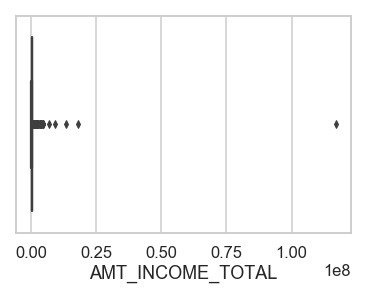

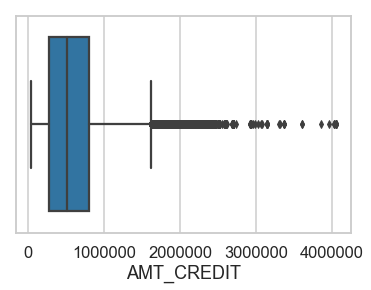

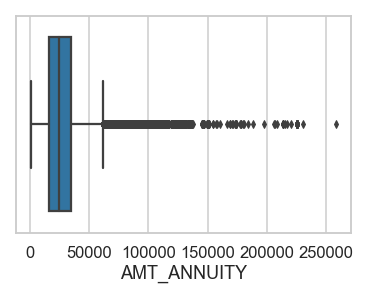

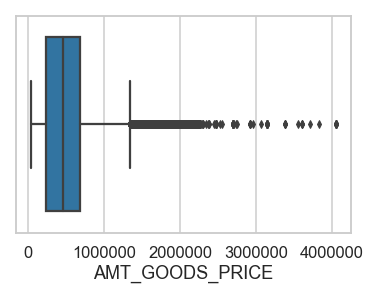

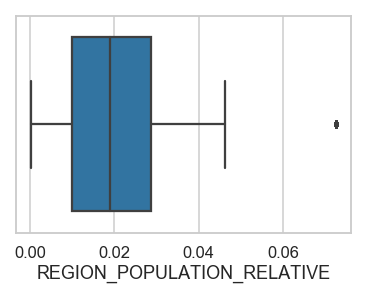

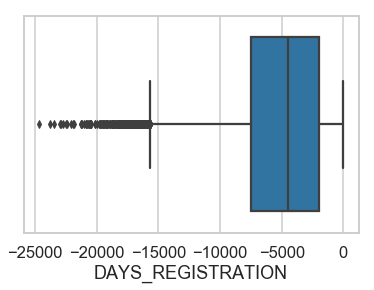

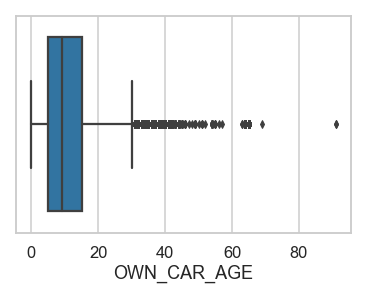

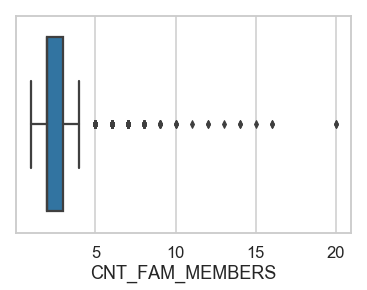

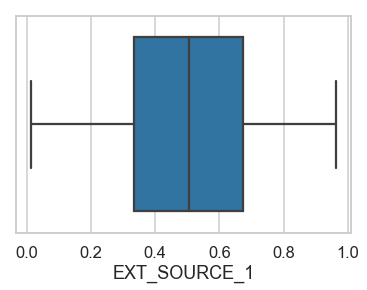

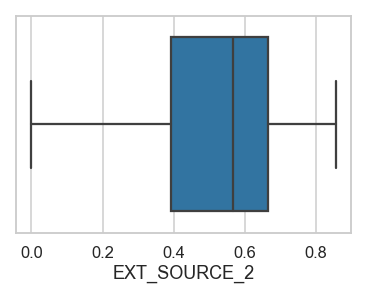

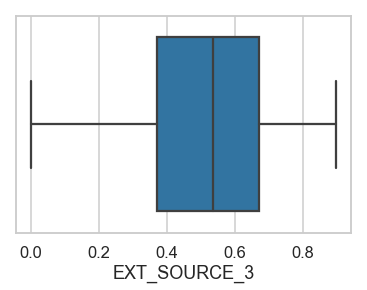

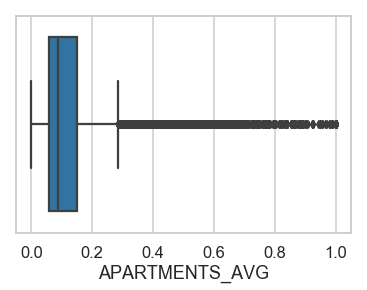

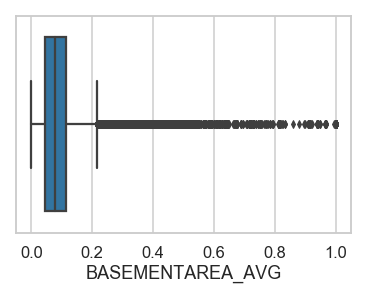

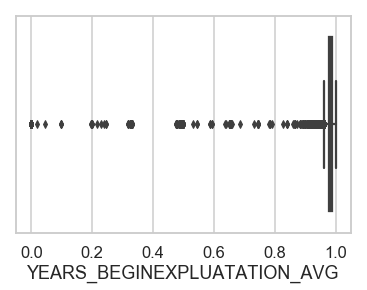

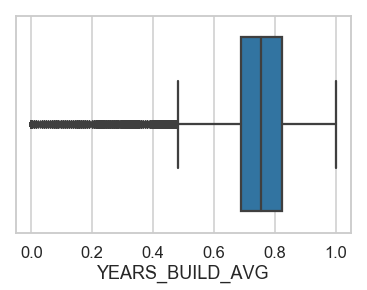

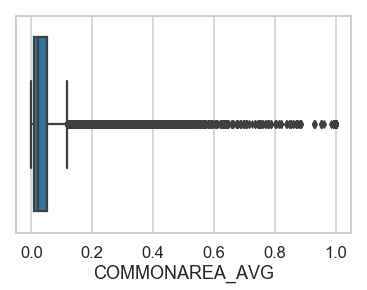

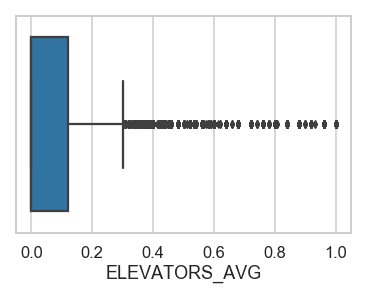

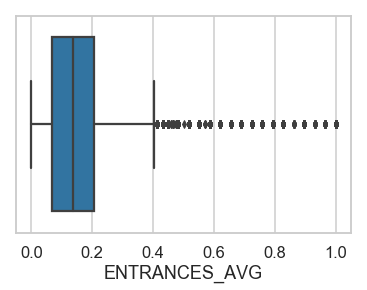

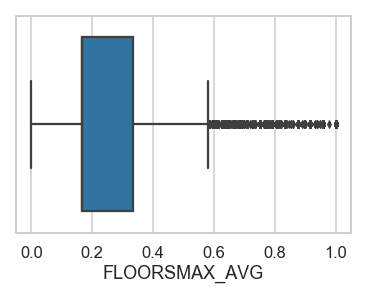

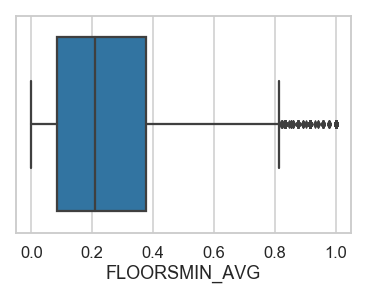

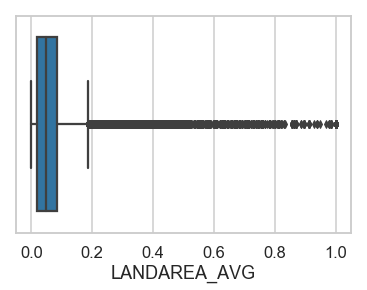

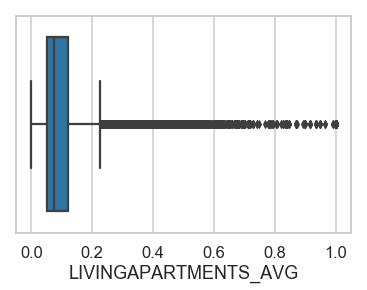

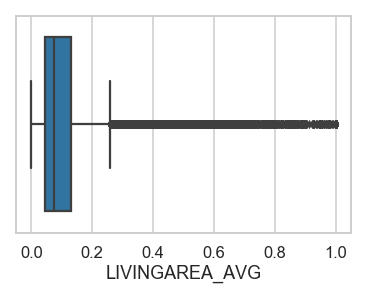

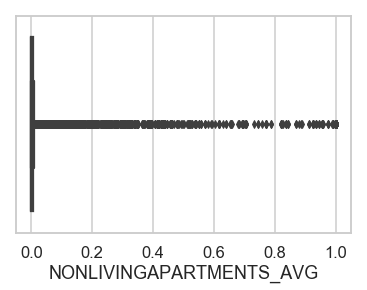

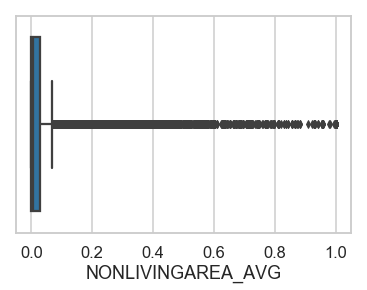

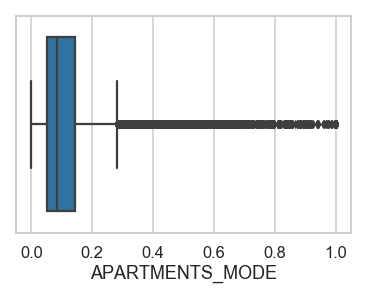

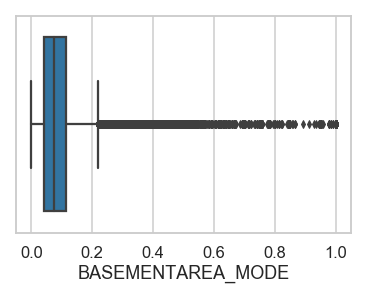

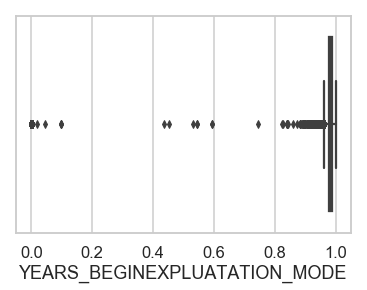

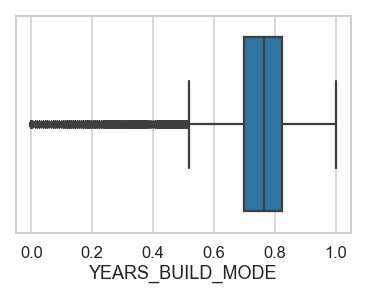

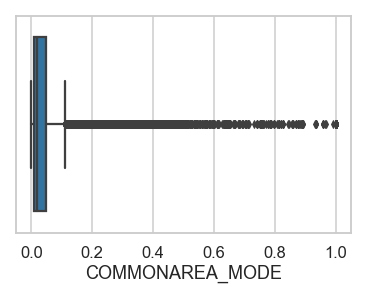

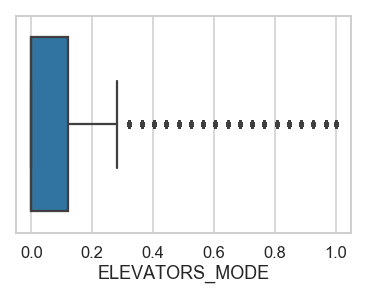

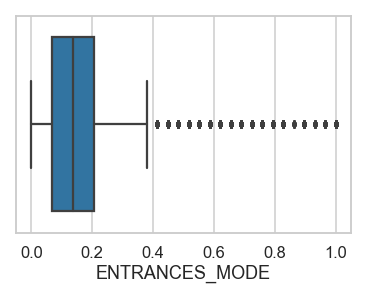

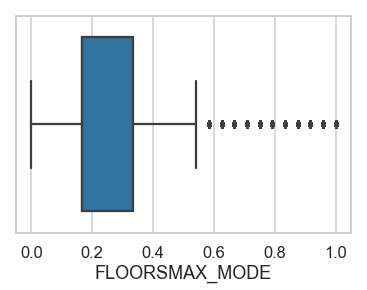

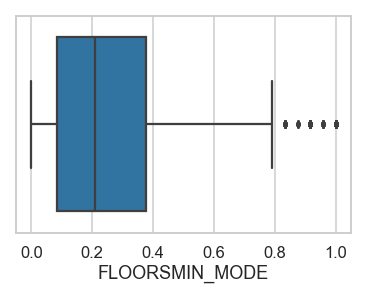

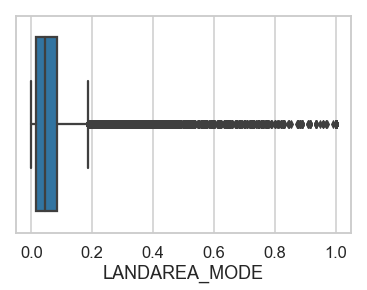

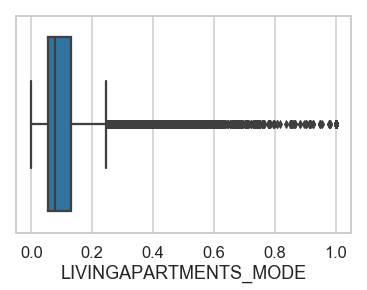

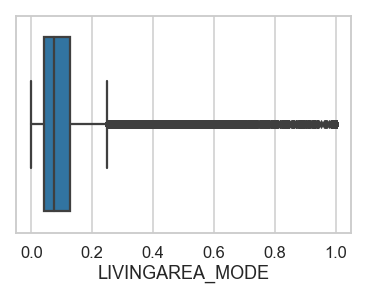

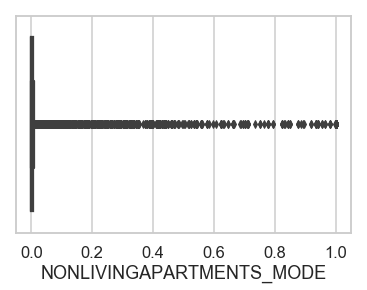

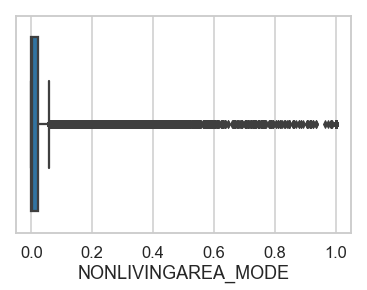

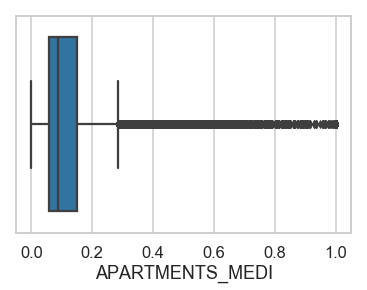

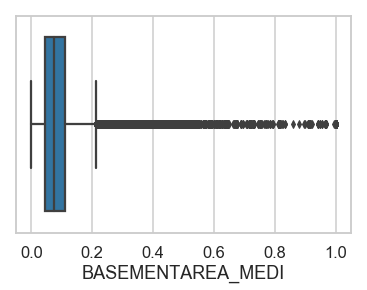

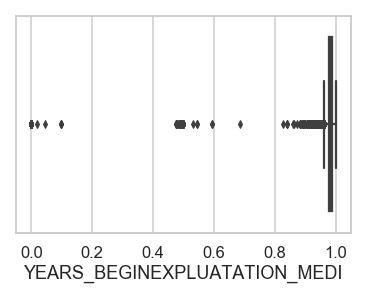

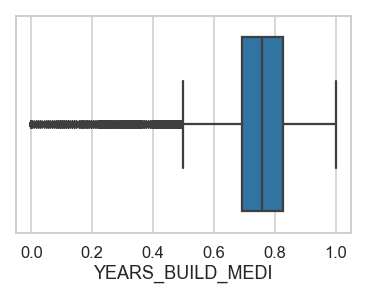

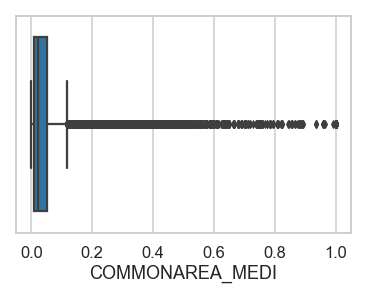

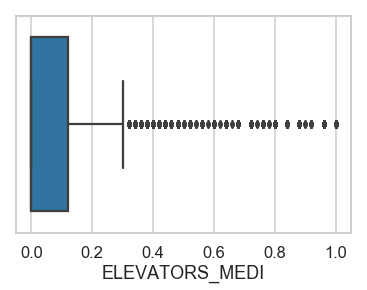

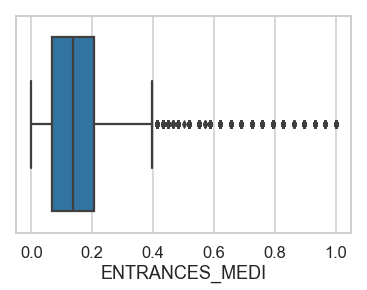

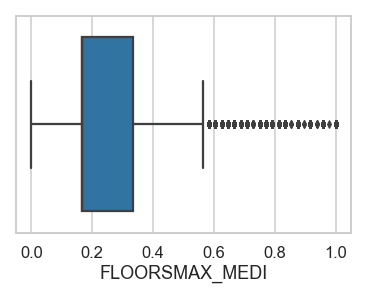

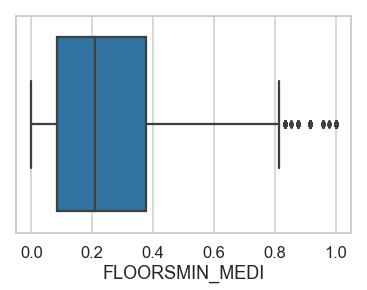

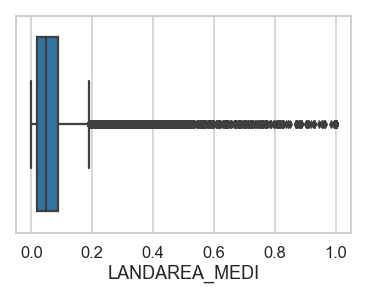

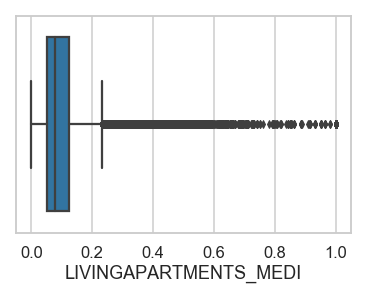

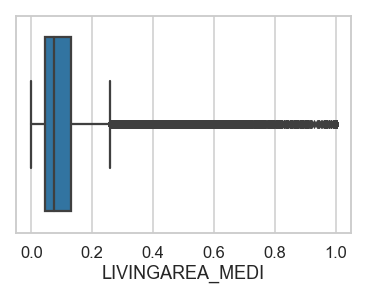

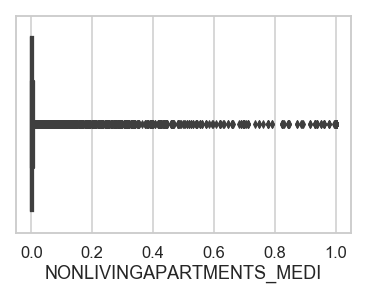

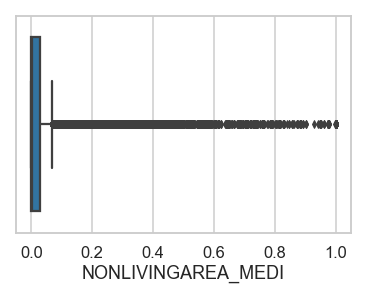

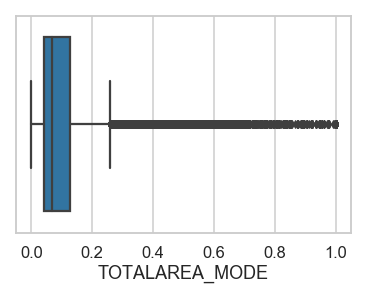

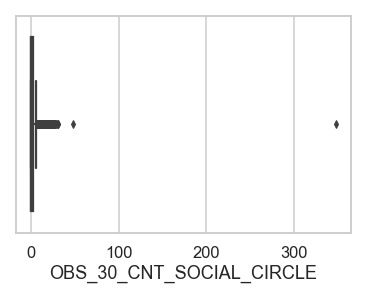

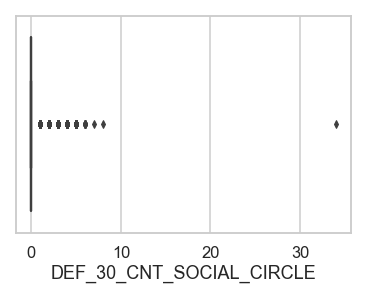

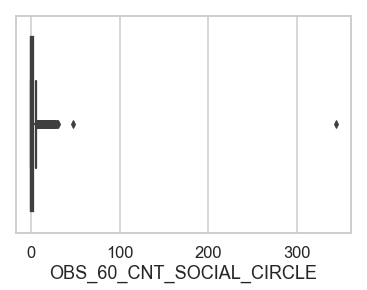

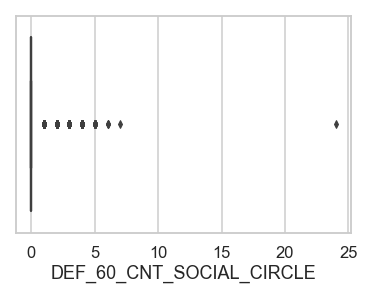

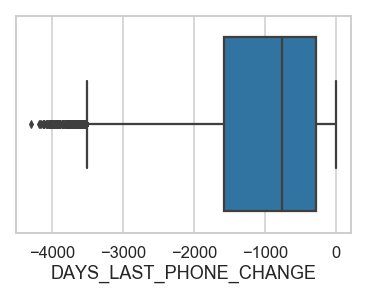

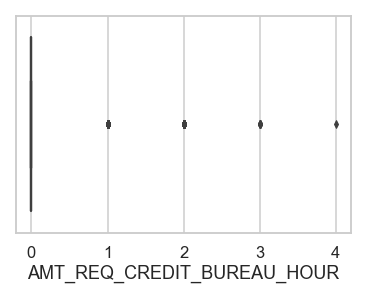

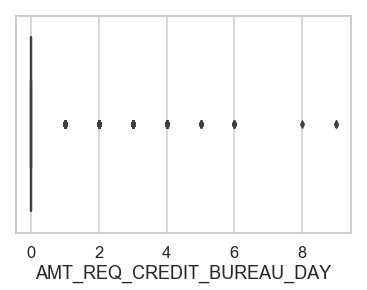

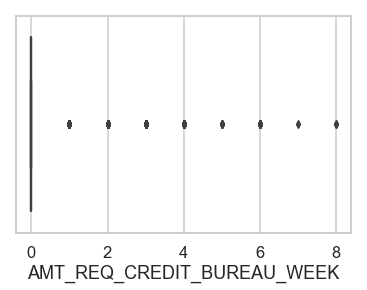

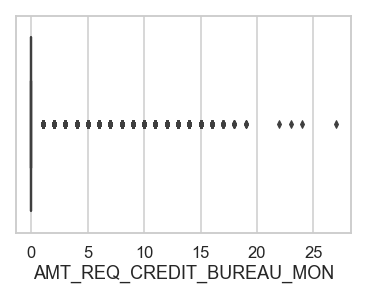

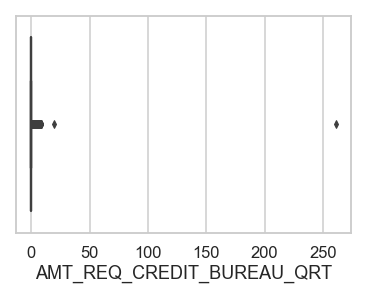

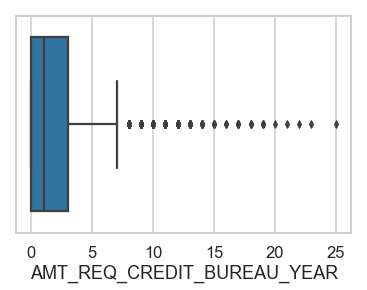

In [ ]:
#We will create boxplot for each of the feature in marginal features, by running it in a loop
for i, col in enumerate(app_data.select_dtypes(include=['float64'])):
    plt.figure(i)
    sns.boxplot(x=col, data=app_data)

__Observations From the boxplot:__

- Some continuous features like DAYS_LAST_PHONE_CHARGE, CNT_FAM_MEMBERS, AMT_AMMUNITY, AMT_GOODS_PRICE are filled with outliers, therefore we will be using medain strategy to fill up the missing values


- 

In [ ]:
mean_cols = [ 'EXT_SOURCE_3','EXT_SOURCE_2']

 
median_cols = [ 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_QRT','DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']


for i in app_data:
    if i in mean_cols:
        app_data[i] = app_data[i].fillna(app_data[i].mean())
    elif i in median_cols:
        app_data[i] = app_data[i].fillna(app_data[i].median())

- There are some columns where the values are filled with XNA values, which mean Not Available. So we have to fill them as well with appropriate



In [ ]:
print(app_data[app_data['CODE_GENDER'] == 'XNA'].shape[0])
print(app_data[app_data['ORGANIZATION_TYPE'] == 'XNA'].shape[0])

#So there are 4 rows form CODE_GENDER columns which we can fill with mode.

app_data['CODE_GENDER'].loc[app_data['CODE_GENDER'] == 'XNA'] = 'F' #mosr frequents gender is Female

app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

4
55374


(0, 122)

- So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values. Hence if we drop the rows of total 55374, will not have any major impact on our dataset

In [ ]:
numeric_columns = ['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

app_data[numeric_columns] = app_data[numeric_columns].apply(pd.to_numeric)

In [ ]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.510853,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


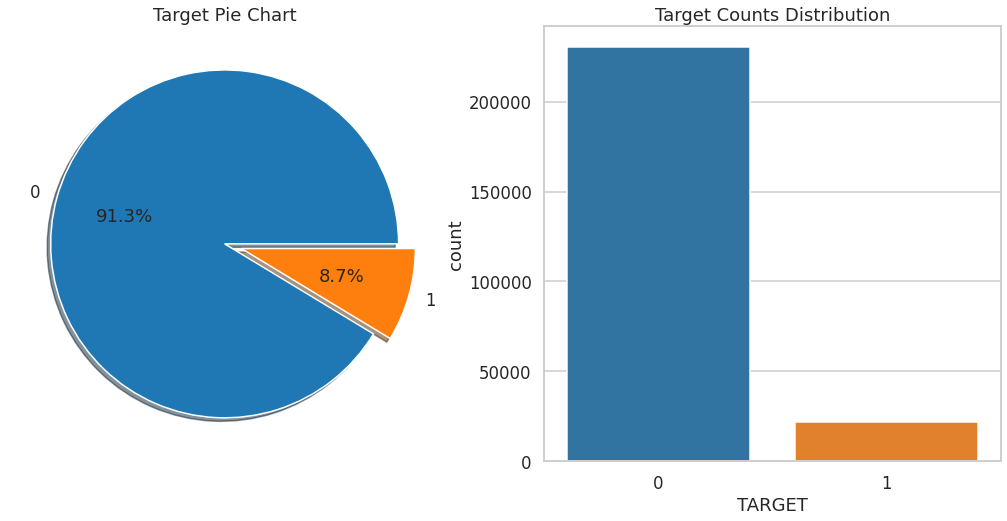

In [ ]:
#first lets check the distribution of target classes

fig, ax = plt.subplots(1,2,figsize=(18,8))
app_data['TARGET'].value_counts().plot.pie(explode=(0,0.1), ax=ax[0], autopct='%1.1f%%', shadow=True)
ax[0].set_title('Target Pie Chart')
ax[0].set_ylabel('')
sns.countplot('TARGET', data=app_data, ax=ax[1])
ax[1].set_title('Target Counts Distribution')
plt.show()

__Observations:__

- TARGET value 0 means loan is repayed, value 1 means loan is not repayed.
- There s only 8.7% of clients who had payment difficulties and couldnt pay their loans and 91.3% of clients of were able to pay their loan

-  Lets do some EDA using custom fucntions.
-  Let's see the type of the loans taken and also, on a separate plot, the percent of the loans (by type of the loan) with TARGET value 1 (not returned loan).
- For this I have created a custom function to plot my garphs 

In [ ]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()
    
def plot_distribution(var):
    
    i = 0
    t1 = app_data.loc[app_data['TARGET'] != 0]
    t0 = app_data.loc[app_data['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

### NAME_CONTRACT_TYPE

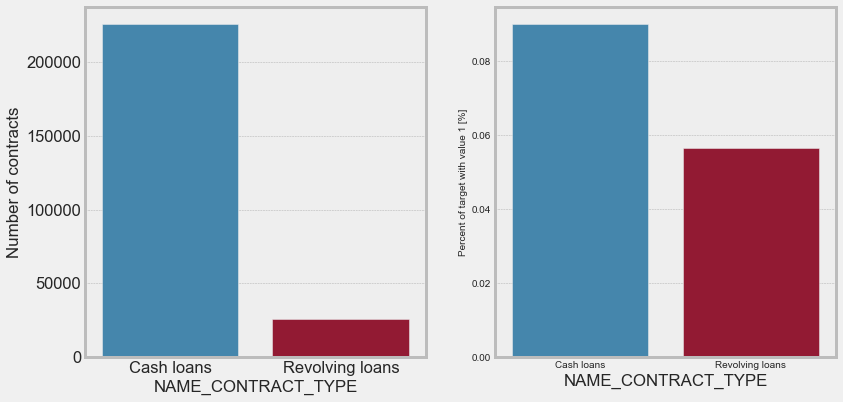

In [ ]:
#Now lets plot on the basis of NAME_CONTRACT_TYPE feature
plot_stats('NAME_CONTRACT_TYPE')

__Observations:__

- Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

## CODE_GENDER

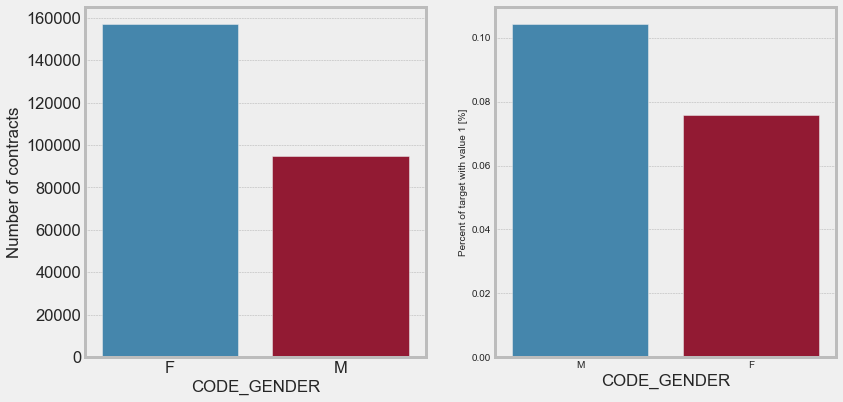

In [ ]:
plot_stats('CODE_GENDER')

__Observations:__

- The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (~7%).

Let's inspect the flags that tell us if a client owns a car or real estate and, on separate plots, the percent of the loans value of these flags) with TARGET value 1 (not returned loan).

## FLAG_OWN_CAR 

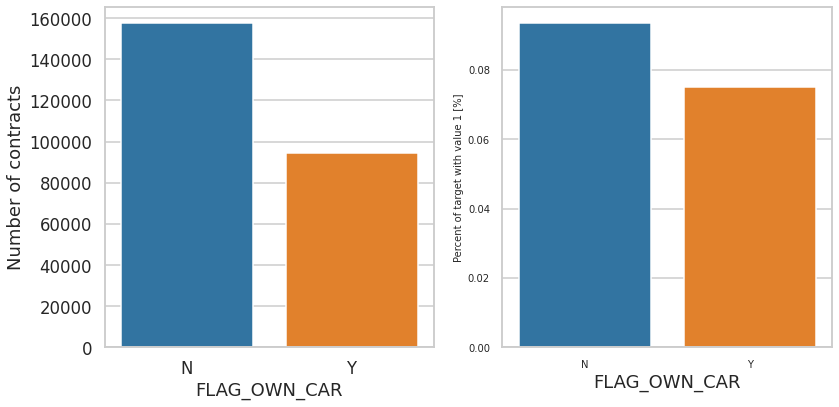

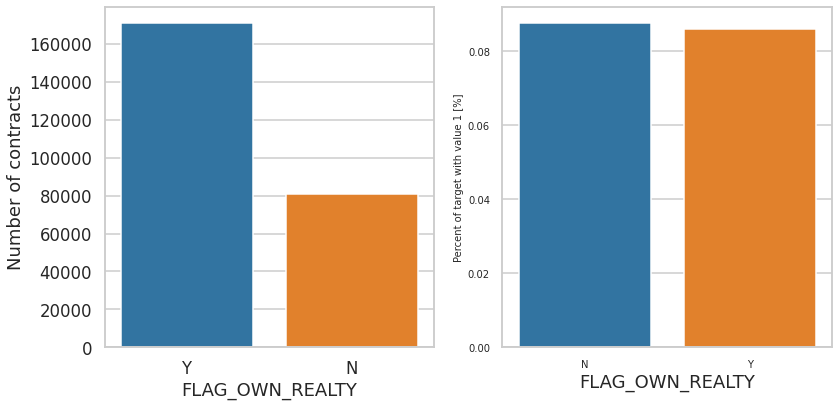

In [ ]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

__Observations:__

- The clients that owns a car are almost a half of the ones that doesn't own one. The clients that owns a car are less likely to not repay a car that the ones that own. Both categories have not-repayment rates around 8%. <br>


- The clients that owns real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates less than 8%.

## FAMILY_STATUS

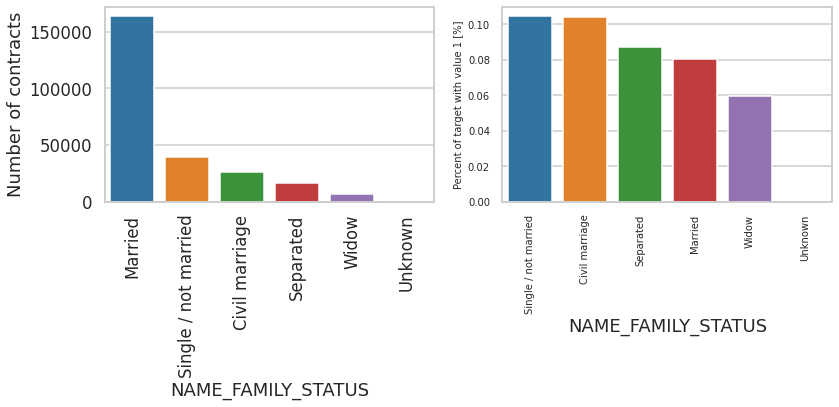

In [ ]:
#Family status of the client

plot_stats('NAME_FAMILY_STATUS', True, True)

__Observations:__

- Most of clients are married, followed by Single/not married and civil marriage.

- In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

## CNT_CHILDREN

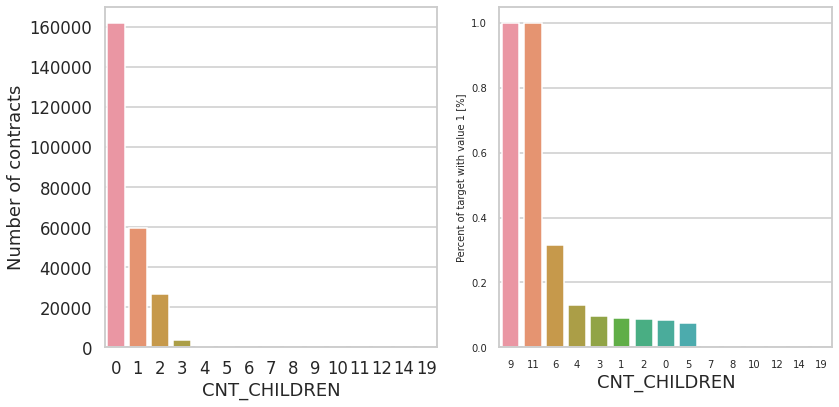

In [ ]:
#Child count
plot_stats('CNT_CHILDREN')

__Observations:__

- Most of the clients that are taking a loan have no childrens or atmost 2 to 3 of them. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare.


- As for repayment, we can see that the number of clients who has 9 to 11 childrens, the percent of loan being unpaid is 100. As for repayment, clients with no children, 1, 2, 3, and 5 children have percents of no repayment around the average (10%).  The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children).

## FAMILY_MEMBERS_COUNT

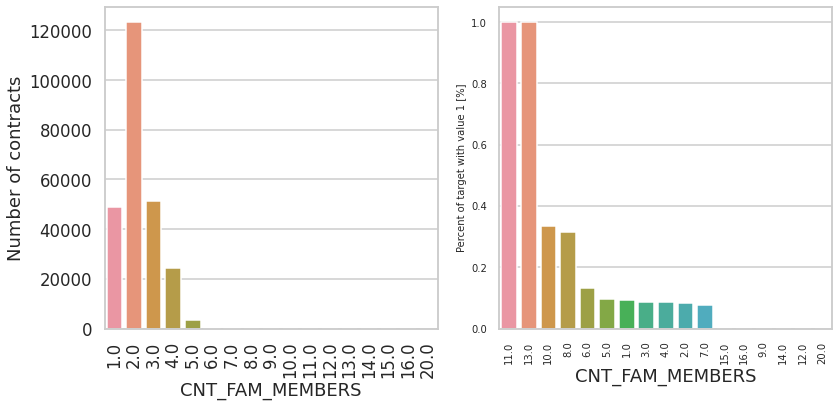

In [ ]:
#Family members count
plot_stats('CNT_FAM_MEMBERS',True)

__Observations:__

- We can see in graph one, that the family with atleast 2 members are more likely to take a loan, followed by 3 and 1 and so on.


- Clients with family size of 11 and 13 have 100% not repayment rate. Other families with 10 or 8 members have percents of not repayment of loans over 30%. Families with 6 or less members have repayment rates close to the 10% average

## NAME_INCOME_TYPE

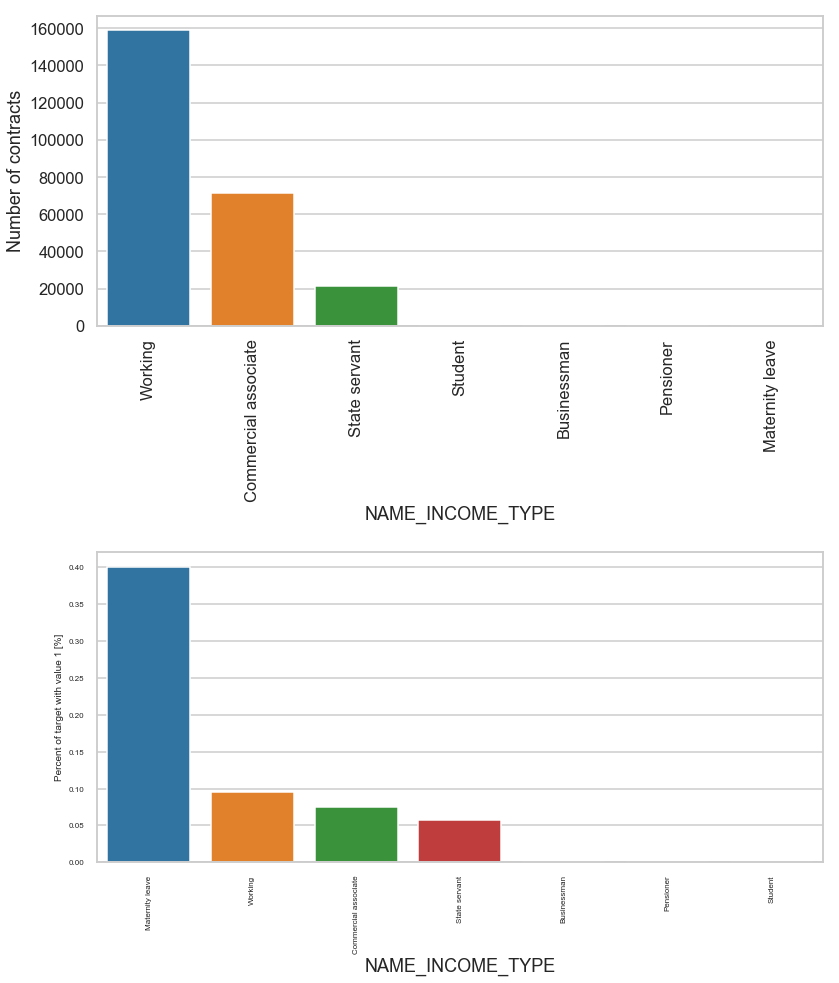

In [ ]:
#Income Type Of client

plot_stats('NAME_INCOME_TYPE',True,False)

__Observations:__

- Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.


- The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

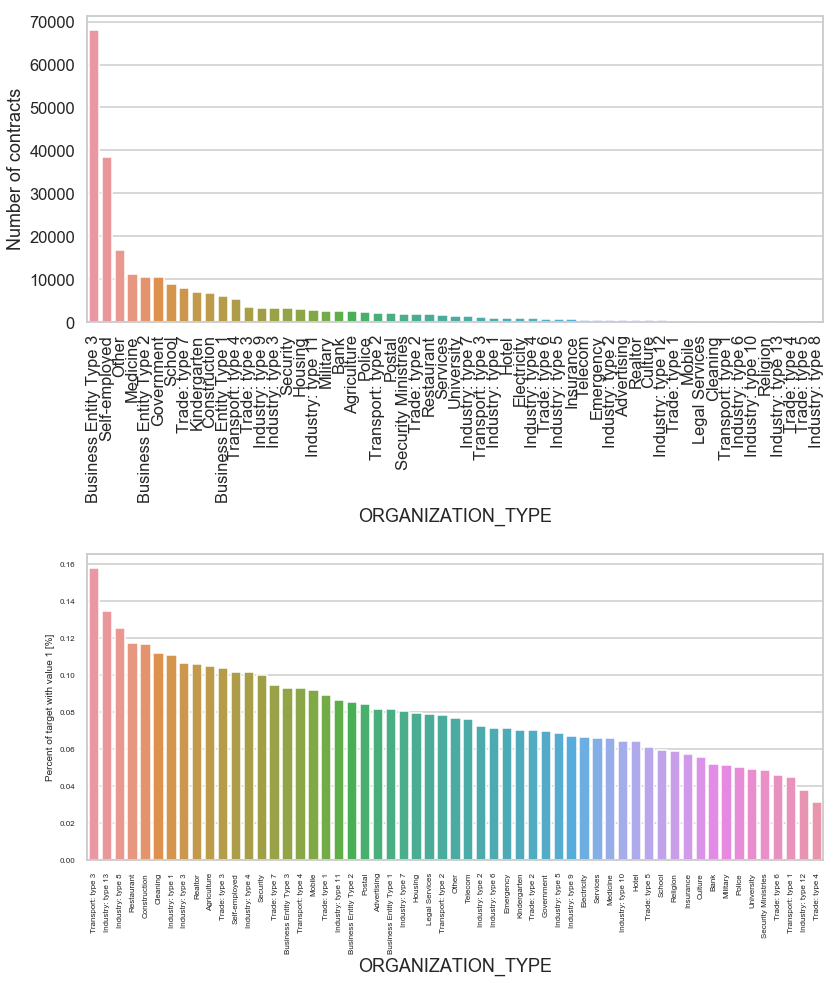

In [ ]:
#Occupation of client
plot_stats('ORGANIZATION_TYPE',True, False)

__Observations:__

- Oraganizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%),
- Industry: type 8 (12.5%) and Restaurant (less than 12%).

## NAME_EDUCATION_TYPE

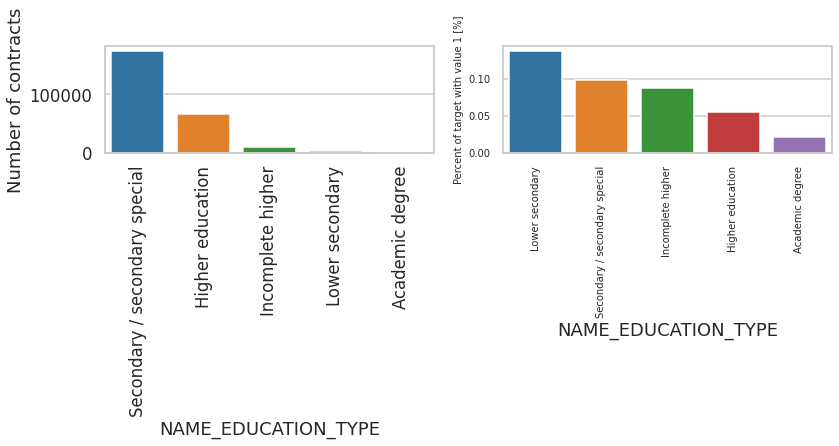

In [ ]:
plot_stats('NAME_EDUCATION_TYPE',True)

__Observations:__

- Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.


- The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). 


- The people with Academic degree have less than 2% not-repayment rate.

## NAME_HOUSING_TYPE

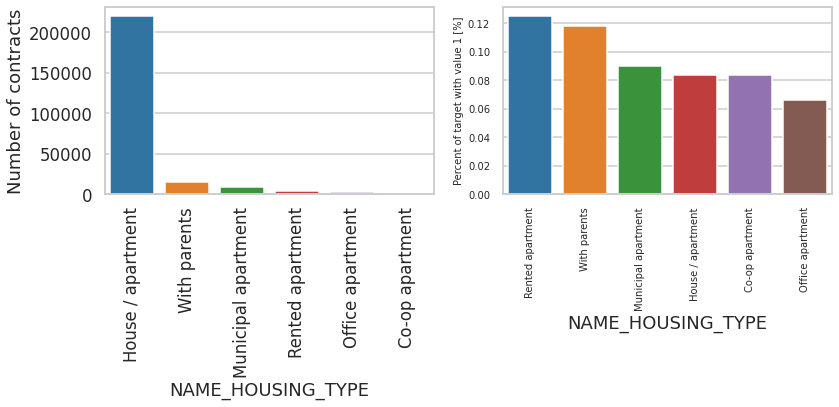

In [ ]:
plot_stats('NAME_HOUSING_TYPE',True)

__Observations:__

- Over 250,000 applicants for credits registered their housing as House/apartment.


- Following categories have a very small number of clients (With parents, Municipal appartment).


- From these categories, Rented apartment and With parents have higher than 10% not-repayment rate.

## REG_REGION_NOT_LIVE_REGION and REG_REGION_NOT_WORK_REGION

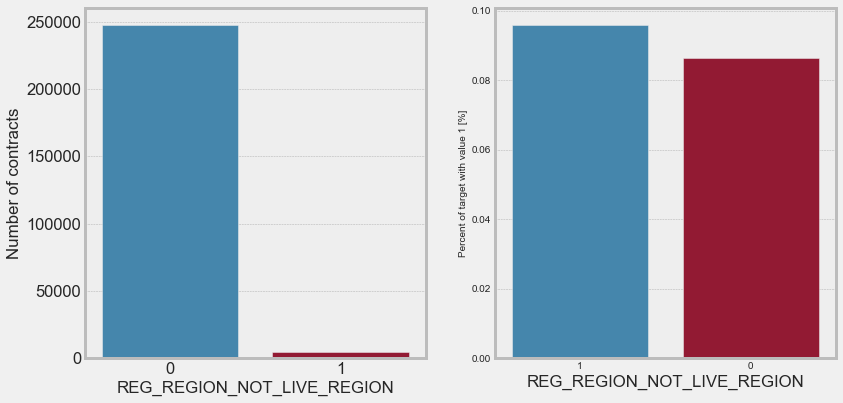

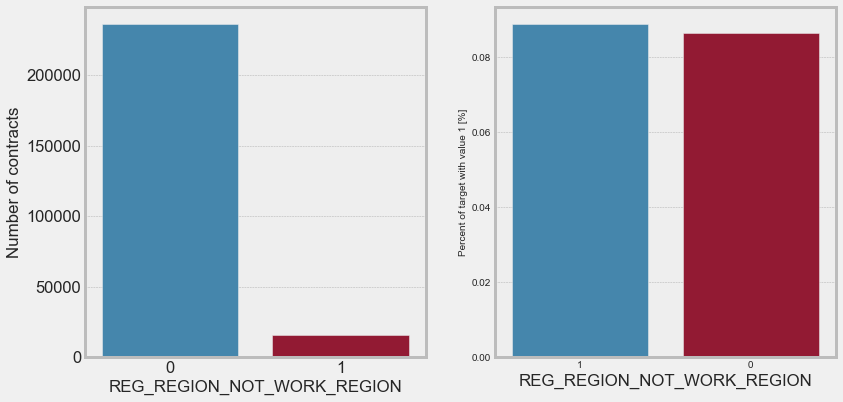

In [ ]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

__Observations:__

- Very few people are registered in not live or not work region. Generally, the rate of not return is slightly larger for these cases than in the rest (slightly above 8% compared with approx. 8%)

## REG_CITY_NOT_LIVE_CITY and REG_CITY_NOT_WORK_CITY

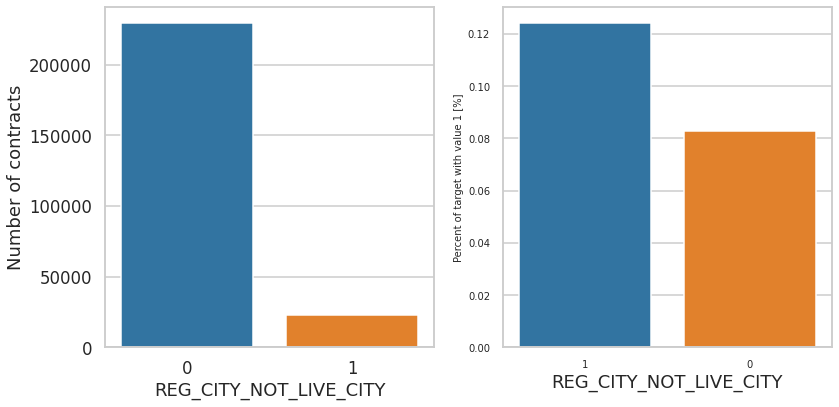

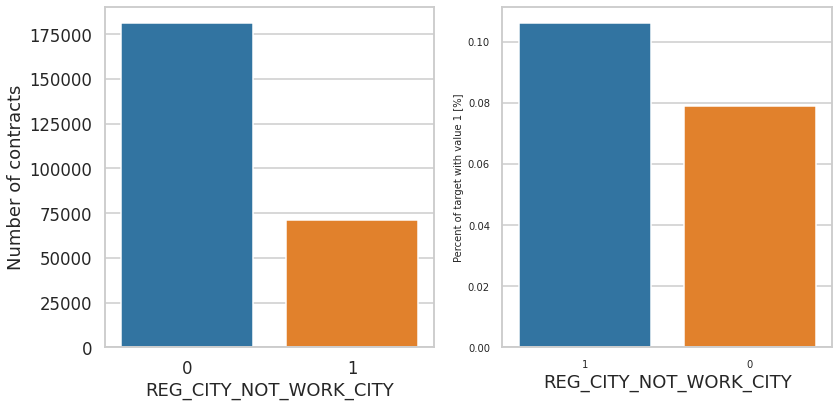

In [ ]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

__Observations:__

- Generally, much more people register in the city they live or work (a larger number register differently in the working city than living city).

- The ones that register in different city than the working or living city are more frequently not-repaying the loans than the ones that register same city (work 11% or live 12%).

### BIVARIATE ANALYSIS

- There are so many almost 20 kinds of documents which seem reduandant as they dont add up to any value in the data So we will make a new feature based on the sum of all those documents and plot the relation

In [ ]:
flag_docs = app_data[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']]

app_data['ALL_DOCS'] = flag_docs.sum(axis=1)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ALL_DOCS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.510853,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
#Now dropping all those features
app_data.drop(columns=flag_docs, inplace=True)

- This is still big, so lets plot only the important features against each other.
- There are many ways We can find out the feature importance but we will follow a simple approach, in which we will find the 
top 20 features which are strongly correlated to our target variable

In [ ]:
#Lets make new dataset copying all the top 25 important features (ask me about this I will tell you how i found these)
app_data_2 = app_data[['TARGET', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY', 'ALL_DOCS',
       'FLAG_WORK_PHONE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN',
       'REG_REGION_NOT_LIVE_REGION']]

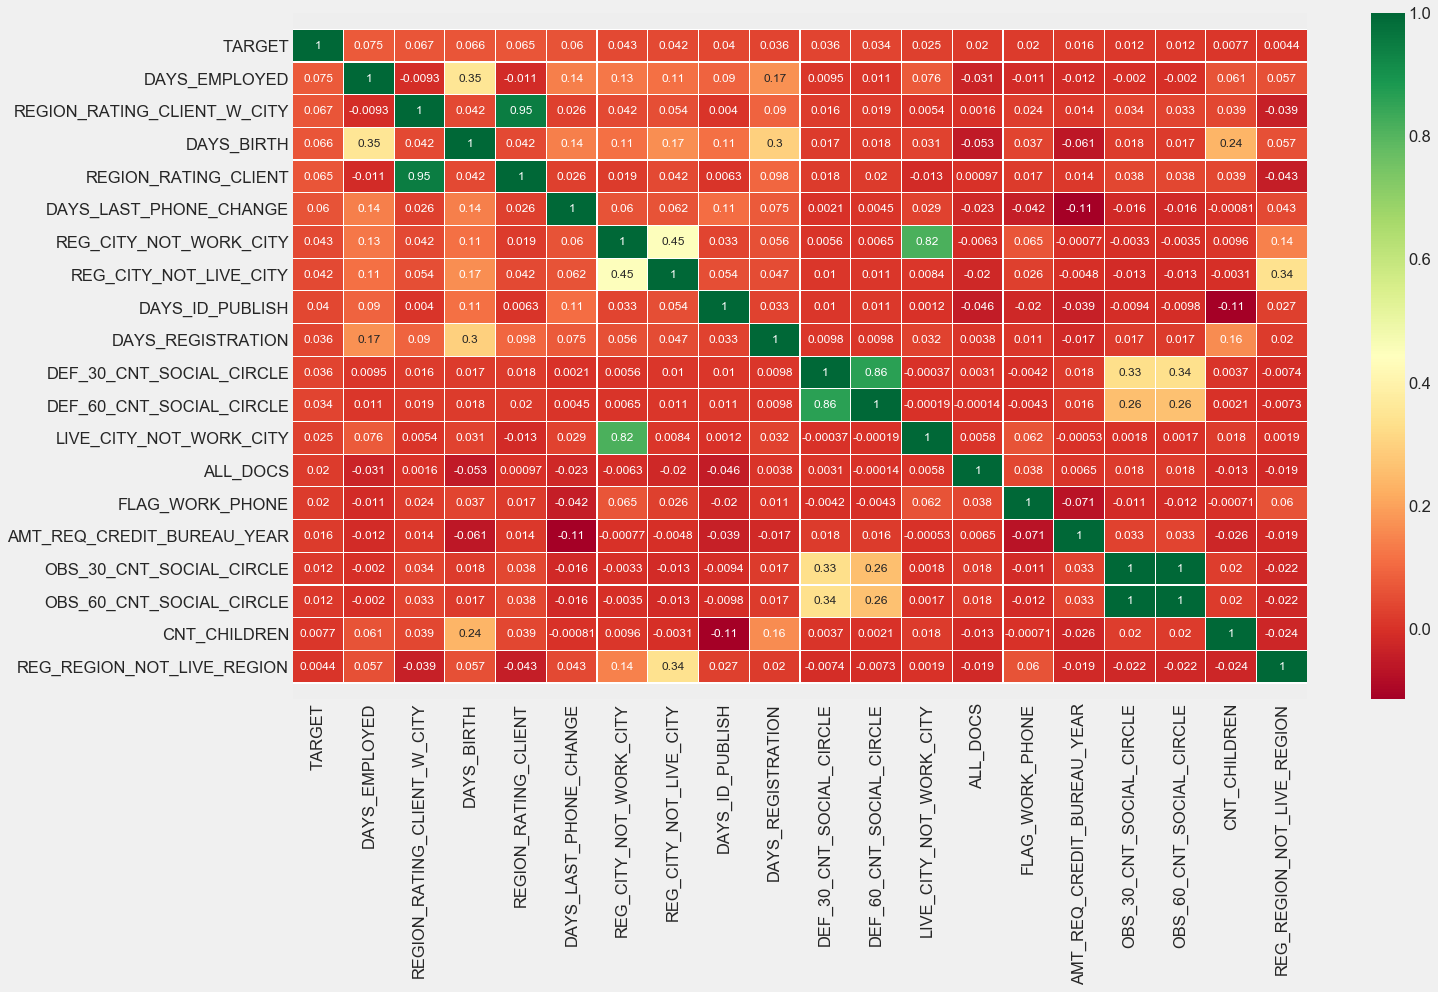

In [ ]:
plt.figure(figsize=(22, 14))
ax = sns.heatmap(app_data_2.corr(), linewidths=0.2, cmap='RdYlGn', annot=True, annot_kws={'size': 12})
bottom ,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.show();

__Observations:__

- There is a strong coorelation between REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT so when it comes to modelling dropping one of them will be a good practice.
- LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY also shows quite a strong correlation

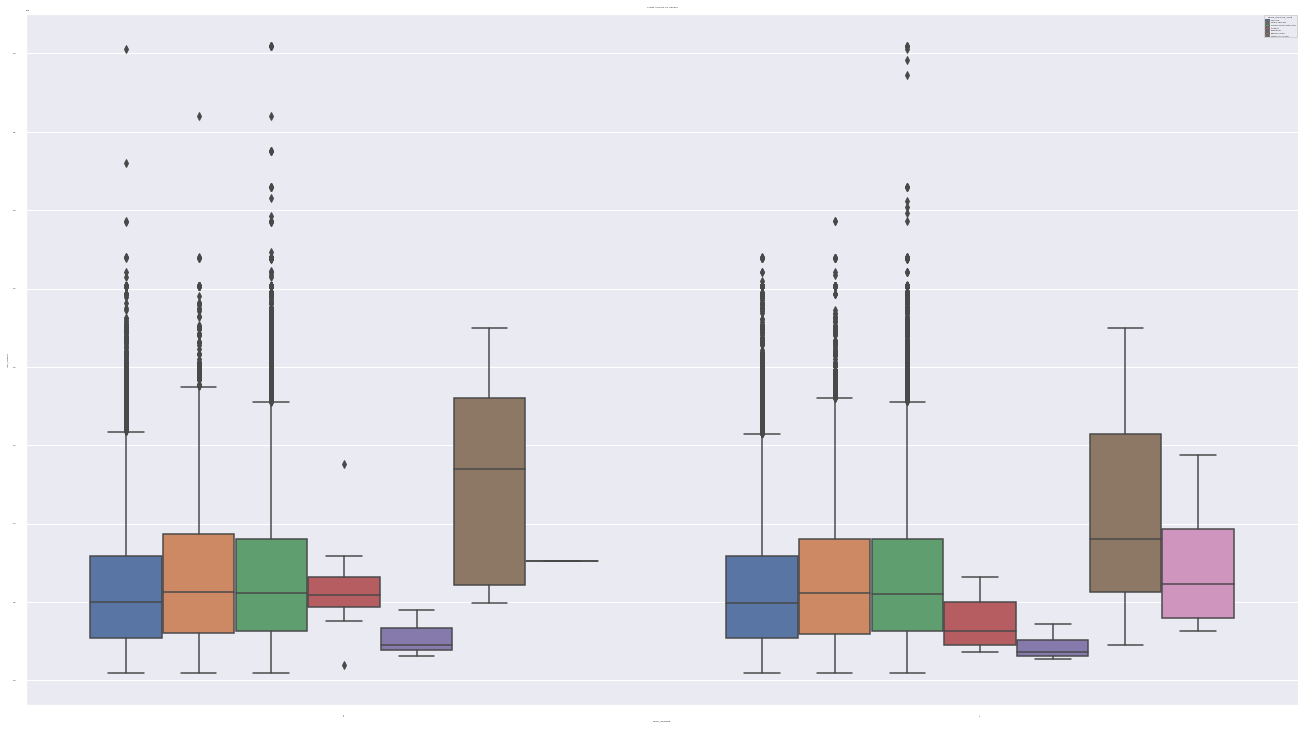

In [ ]:
fig , ax = plt.subplots(figsize=(18,10))
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', hue='NAME_INCOME_TYPE', data=app_data, orient='v', ax=ax)
ax.set_title('Credit Amount VS Gender')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

__Observations:__

- From the above graph in male sections we can conclude that the businessman have more credit points as compared to the rest of the other categories. Thus, they take more loan amount in credit. This is followed by State Servants, Commercial Associate and Working who also have many outliers in their categories.


- From the above graph in Female section we can conclude that the businesswoman have more credit points as compared to the rest of the other categories which is followed by maternity leave category, State Servants, commercial associate and working with many outliers in their categories.


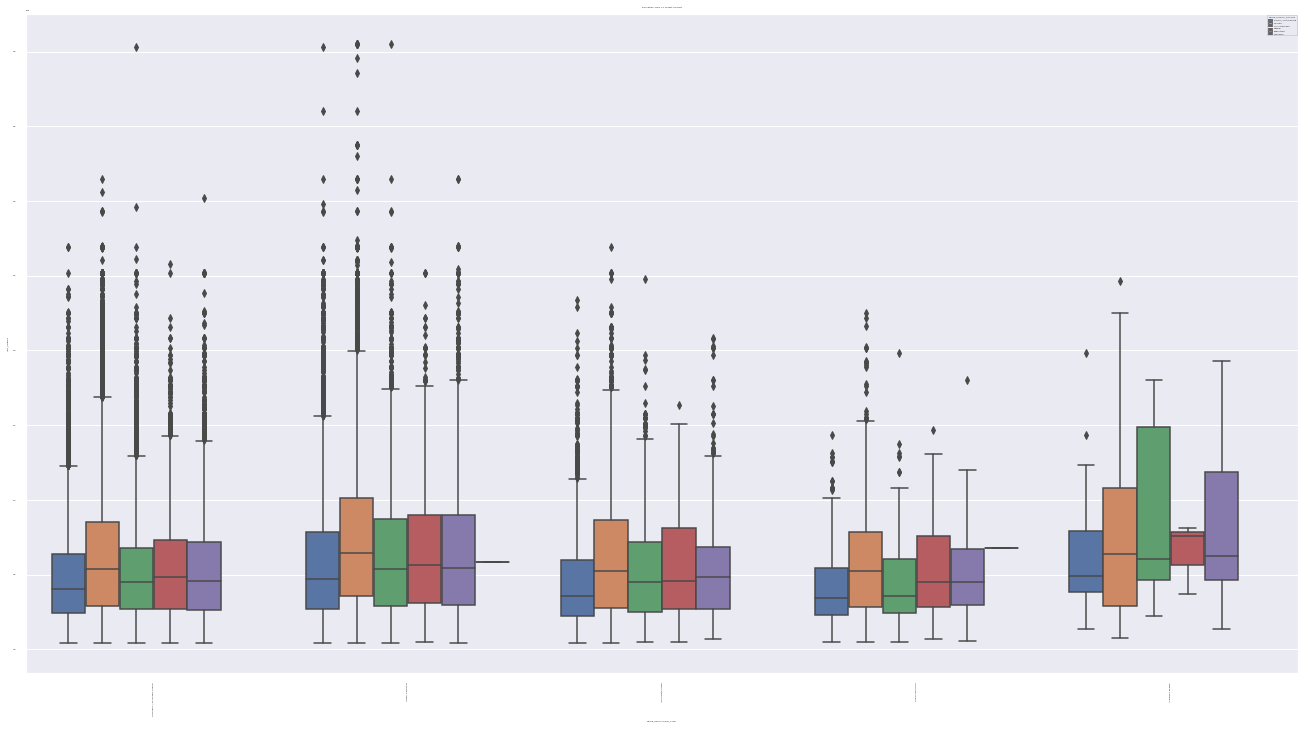

In [ ]:
fig , ax = plt.subplots(figsize=(18,10))
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS', data=app_data, orient='v', ax=ax)
ax.set_title('Education Type VS Credit Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

__Observations:__

- From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

In [ ]:
for i in app_data.select_dtypes(include=['int64','float32']):
  print('The feature {} has {} % skewness'.format(app_data[i].name, round(app_data[i].skew())))

#You can draw insights from this where you can show the features which are ositively or negatively skewed 
#If skewness is less than -1 or greater than 1, the distribution is highly skewed. 
#If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, 
#the distribution is approximately symmetric.

The feature SK_ID_CURR has 0 % skewness
The feature TARGET has 3 % skewness
The feature CNT_CHILDREN has 2 % skewness
The feature DAYS_BIRTH has 0 % skewness
The feature DAYS_EMPLOYED has -2 % skewness
The feature DAYS_ID_PUBLISH has 0 % skewness
The feature FLAG_MOBIL has -502 % skewness
The feature FLAG_EMP_PHONE has -145 % skewness
The feature FLAG_WORK_PHONE has 1 % skewness
The feature FLAG_CONT_MOBILE has -22 % skewness
The feature FLAG_PHONE has 1 % skewness
The feature FLAG_EMAIL has 4 % skewness
The feature REGION_RATING_CLIENT has 0 % skewness
The feature REGION_RATING_CLIENT_W_CITY has 0 % skewness
The feature HOUR_APPR_PROCESS_START has 0 % skewness
The feature REG_REGION_NOT_LIVE_REGION has 7 % skewness
The feature REG_REGION_NOT_WORK_REGION has 4 % skewness
The feature LIVE_REGION_NOT_WORK_REGION has 4 % skewness
The feature REG_CITY_NOT_LIVE_CITY has 3 % skewness
The feature REG_CITY_NOT_WORK_CITY has 1 % skewness
The feature LIVE_CITY_NOT_WORK_CITY has 1 % skewness
The 

In [ ]:
#finding missing columns and removing them
null_cols=prev_data.isnull().sum()
null_cols=null_cols[null_cols.values>(0.3*len(null_cols))]
len(null_cols)

15

In [ ]:
#Removing those 15 columns
null_cols = list(null_cols[null_cols.values>=0.3].index)
prev_data.drop(labels=null_cols,axis=1,inplace=True)
prev_data.shape

(1670214, 22)

In [ ]:
# Removing the column values of 'XNA' and 'XAP'

prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [ ]:
# Now merging the Application dataset with previous appliaction dataset

final_df=pd.merge(left=app_data,right=prev_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [ ]:
final_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ALL_DOCS,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.297914,0.502779,0.510853,0.1505,0.0838,0.9831,0.7688,0.0188,0.16,0.1379,0.3333,0.3750,0.0872,0.1210,0.1412,0.0077,0.0061,0.1534,0.0870,0.9831,0.7779,0.0190,0.1611,0.1379,0.3333,0.3750,0.0892,0.1322,0.1471,0.0078,0.0065,0.1520,0.0838,0.9831,0.7719,0.0189,0.16,0.1379,0.3333,0.3750,0.0887,0.1231,0.1437,0.0078,0.0063,reg oper account,block of flats,0.1227,Panel,No,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,NaN,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,NaN,0.479987,0.410103,0.0124,NaN,0.9697,NaN,NaN,0.00,0.0690,0.0417,NaN,NaN,NaN,0.0149,NaN,0.0000,0.0126,NaN,0.9697,NaN,NaN,0.0000,0.0690,0.0417,NaN,NaN,NaN,0.0155,NaN,0.0000,0.0125,NaN,0.9697,NaN,NaN,0.00,0.0690,0.0417,NaN,NaN,NaN,0.0152,NaN,0.0000,Na

In [ ]:
# Removing unwanted columns for analysis
# Renaming the column names after merging

final_df = final_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

# final_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
#               'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
#               'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
#               'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

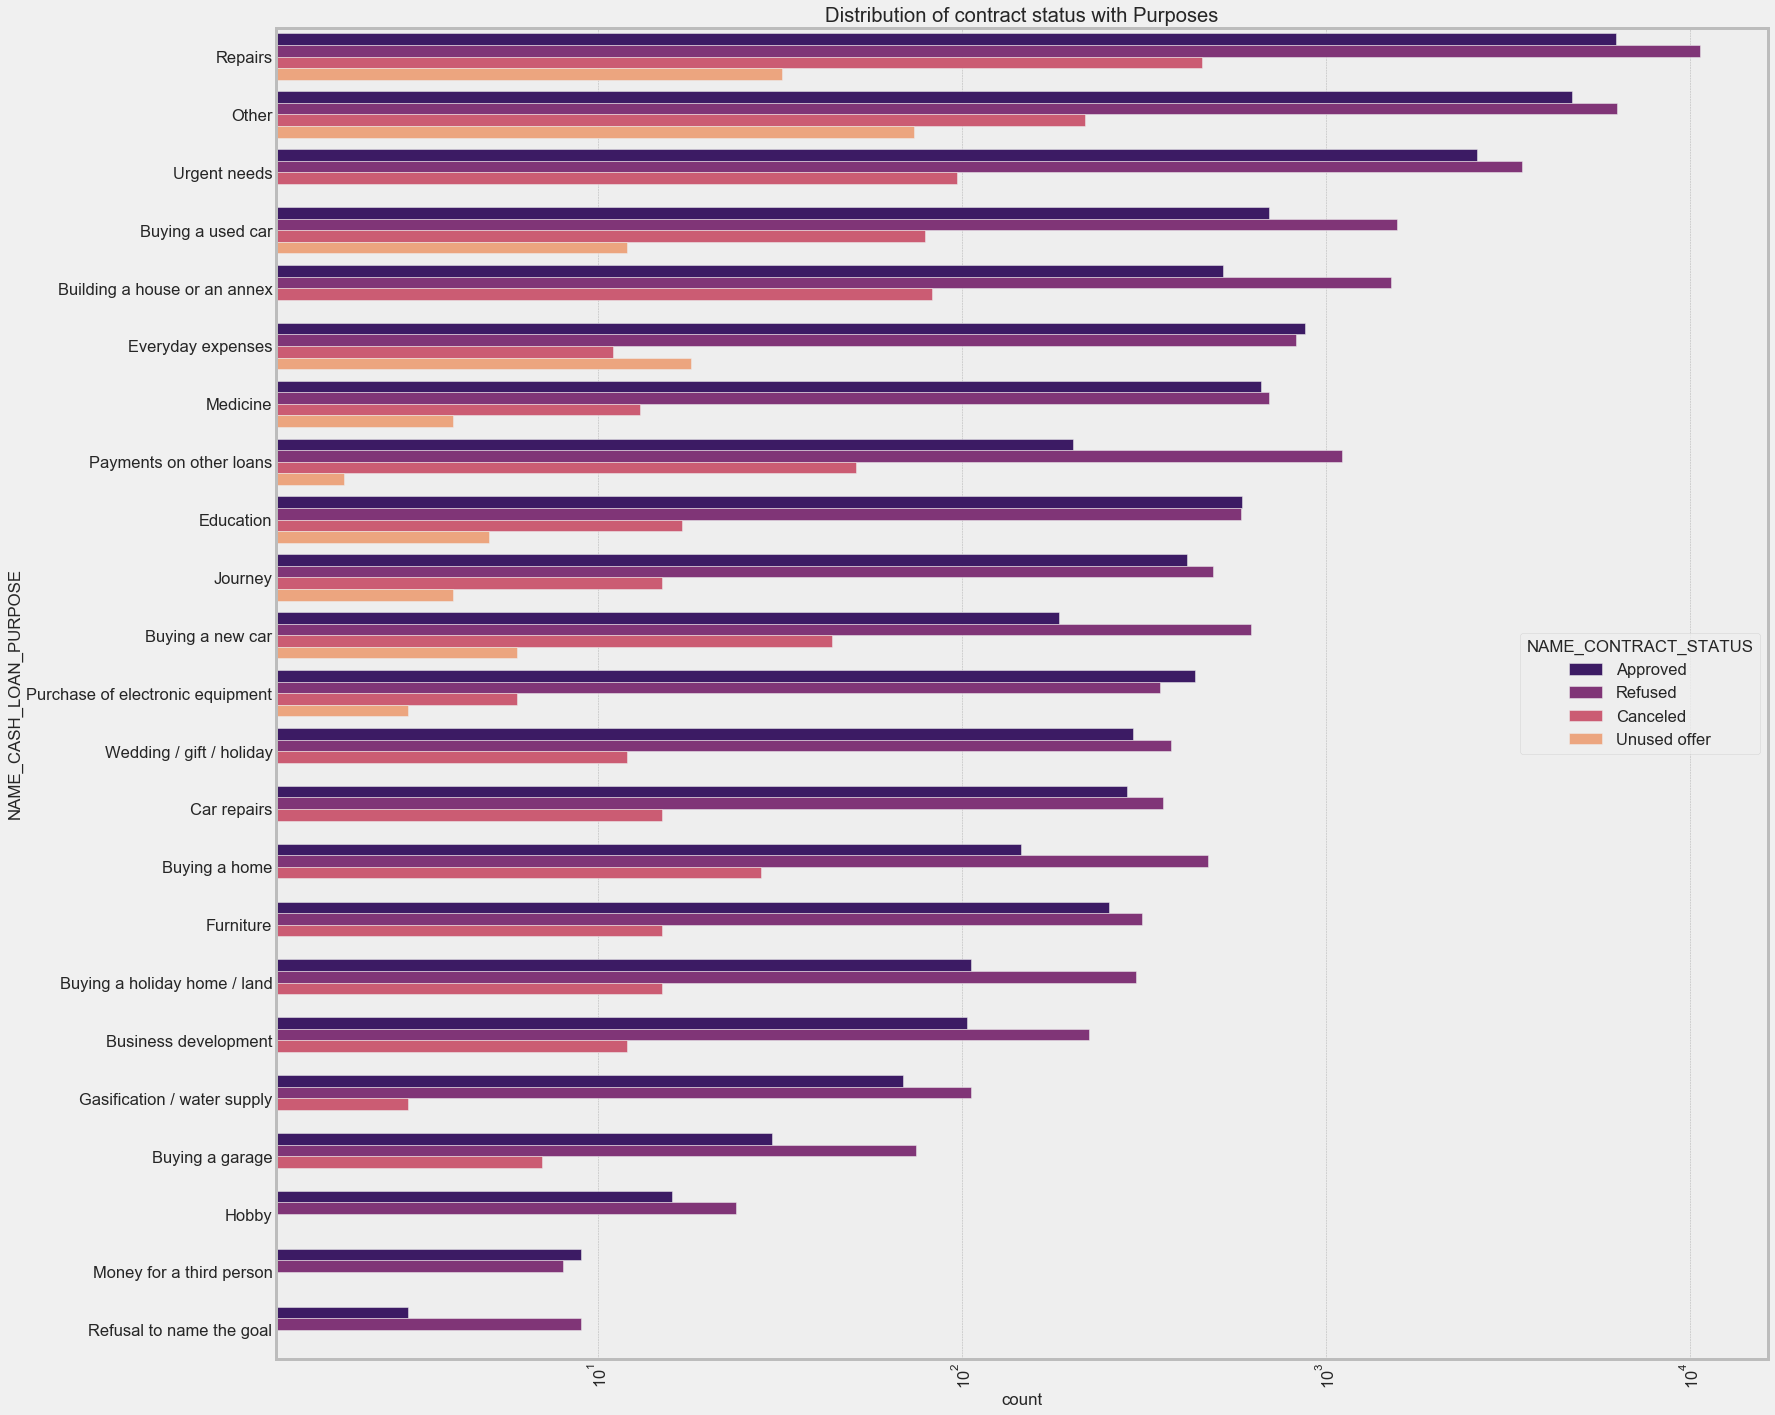

In [ ]:
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.countplot(data = final_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=final_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')
ax.set_title('Distribution of contract status with Purposes')
plt.xticks(rotation=90)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
sns.set_style('whitegrid')
sns.set_context('talk')
plt.xscale('log')
plt.tight_layout()
plt.show()

__Observations:__

- Most rejection of loans came from purpose 'repairs'.
- For education purposes we have equal number of approves and rejection
- Payign other loans and buying a new car is having significant higher rejection than approves.

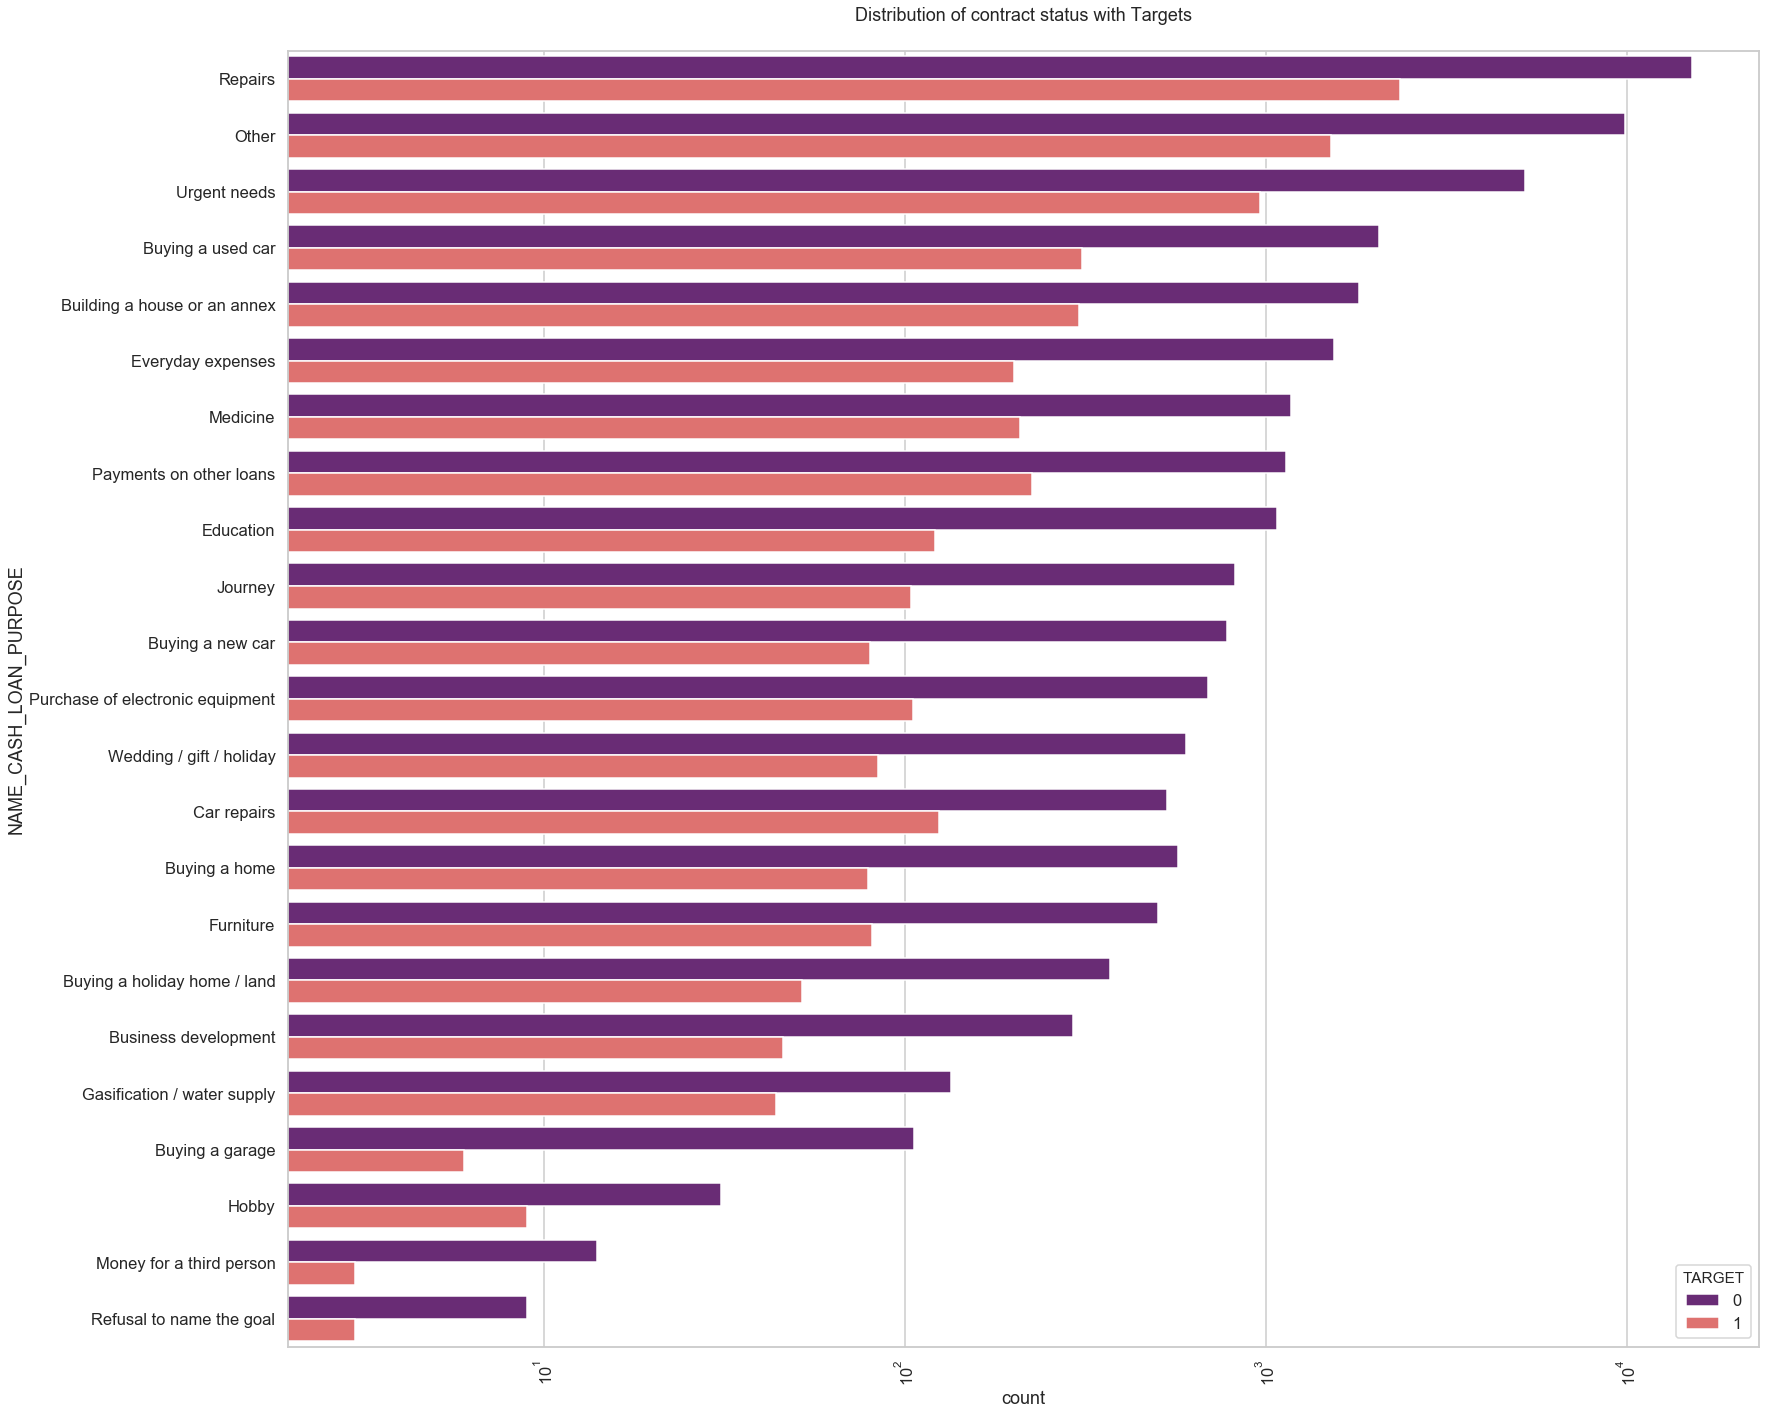

In [ ]:
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.countplot(data = final_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=final_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')
ax.set_title('Distribution of contract status with Targets')
plt.xticks(rotation=90)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
sns.set_style('whitegrid')
sns.set_context('talk')
plt.xscale('log')
plt.tight_layout()
plt.show()

__Observations__:

- Loan purposes with 'Repairs' are facing more difficulites in payment on time.
- There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt',
- 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

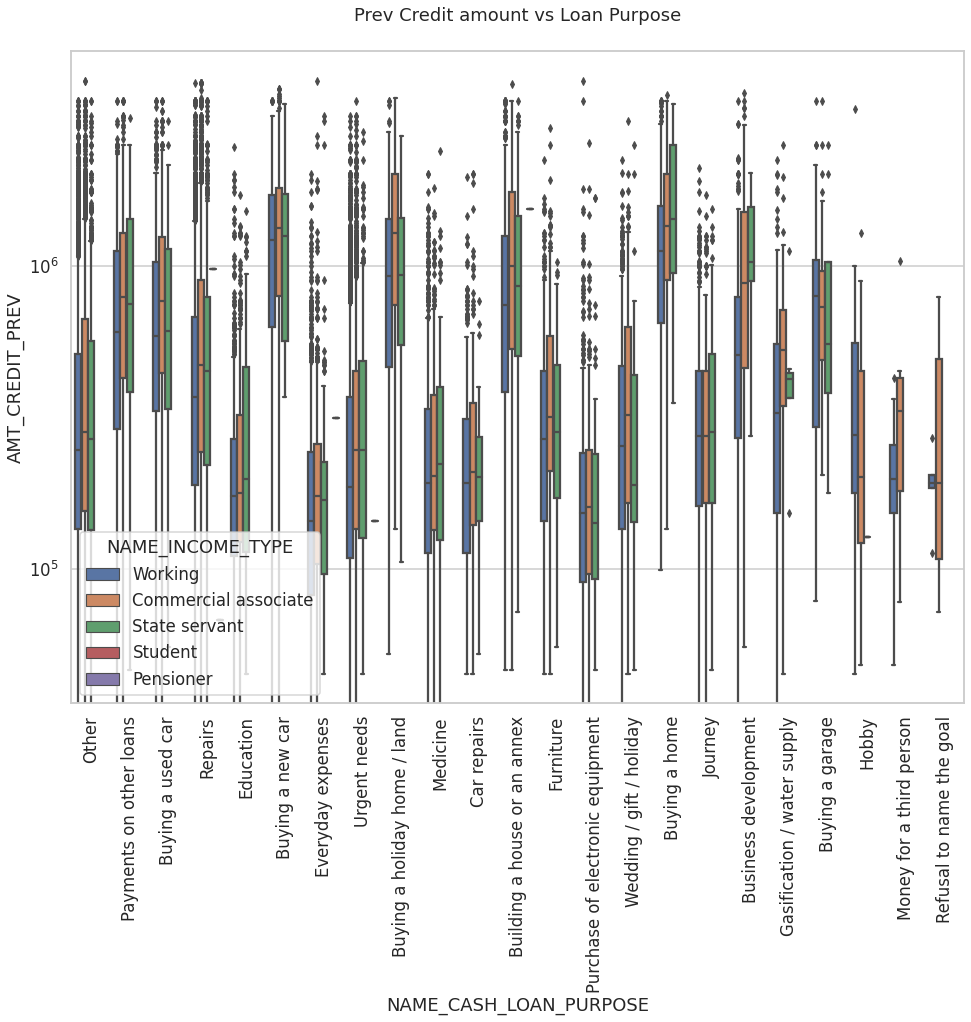

In [ ]:
#BIVARIATE ANALYSIS

# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =final_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

__Observations:__

- The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
- Income type of state servants have a significant amount of credit applied
- Money for third person or a Hobby is having less credits applied for.

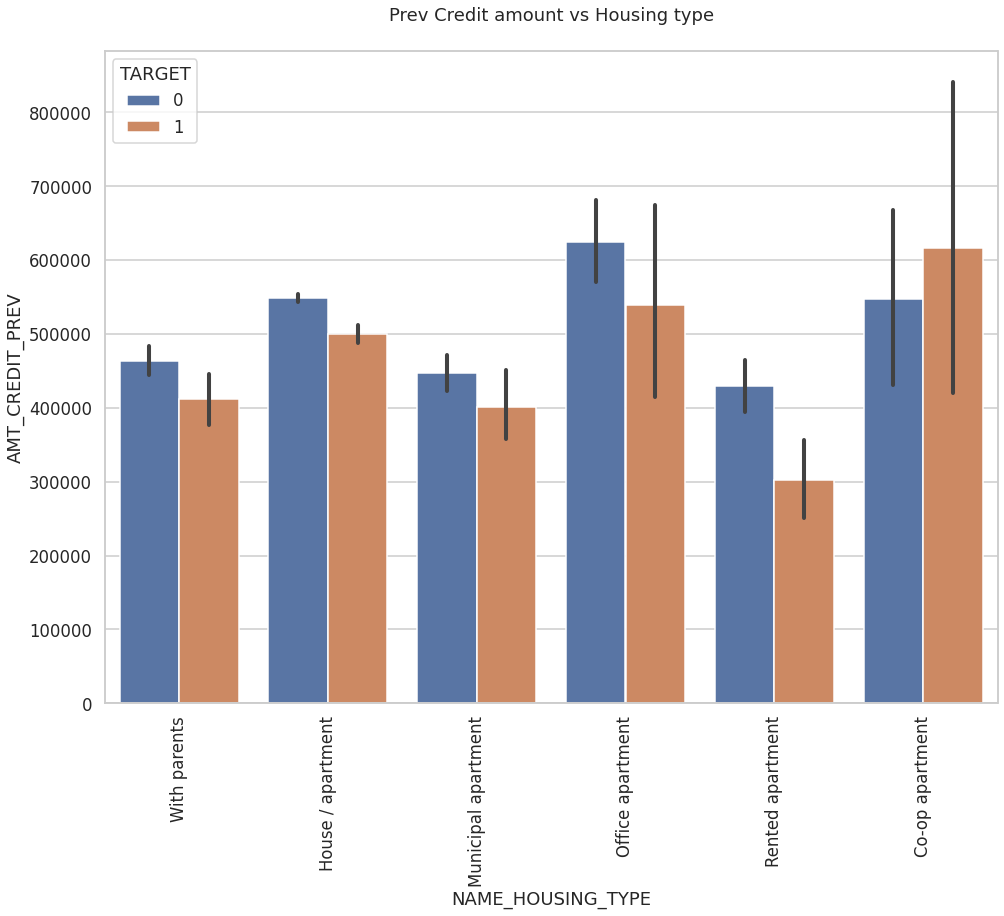

In [ ]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =final_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

__Observations:__

- Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. 

__Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments__